In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



# Load the dataset
df = pd.read_csv(r'/Users/manishkavuri/Downloads/nba_player_stats_with_scores.csv')

# Dictionary of MVP winners 
mvp_winners = {
    "2022-23": "Joel Embiid",
    "2021-22": "Nikola Jokic",
    "2020-21": "Nikola Jokic",
    "2019-20": "Giannis Antetokounmpo",
    "2018-19": "Giannis Antetokounmpo",
    "2017-18": "James Harden",
    "2016-17": "Russell Westbrook",
    "2015-16": "Stephen Curry",
    "2014-15": "Stephen Curry",
    "2013-14": "Kevin Durant",
    "2012-13": "LeBron James",
    "2011-12": "LeBron James",
    "2010-11": "Derrick Rose",
    "2009-10": "LeBron James",
    "2008-09": "LeBron James",
    "2007-08": "Kobe Bryant",
    "2006-07": "Dirk Nowitzki",
    "2005-06": "Steve Nash",
    "2004-05": "Steve Nash",
    "2003-04": "Kevin Garnett",
    "2002-03": "Tim Duncan",
    "2001-02": "Tim Duncan",
    "2000-01": "Allen Iverson",
    "1999-00": "Shaquille O'Neal"
}

# Ensure the MVP column exists and initialize all values to 0
df["MVP"] = 0

# Iterate over each season and update the corresponding MVP
for season, mvp in mvp_winners.items():
    df.loc[(df["season"] == season) & (df["playerName"] == mvp), "MVP"] = 1

# Save the updated dataset
updated_file_path = '/Users/manishkavuri/Downloads/nba_player_stats_with_scores.csv'
df.to_csv(updated_file_path, index=False)

# Display confirmation
print(f"Updated dataset saved to {updated_file_path}")











Updated dataset saved to /Users/manishkavuri/Downloads/nba_player_stats_with_scores.csv


Summary Statistics:
            games_x       points      assists      totalRb       steals  \
count  1397.000000  1397.000000  1397.000000  1397.000000  1397.000000   
mean     71.730136  1423.179671   292.171081   442.962777    82.456693   
std       9.096477   330.214936   163.952375   209.074900    33.670286   
min      51.000000   803.000000    37.000000   124.000000    20.000000   
25%      65.000000  1196.000000   169.000000   282.000000    58.000000   
50%      74.000000  1372.000000   250.000000   390.000000    77.000000   
75%      80.000000  1616.000000   385.000000   570.000000   102.000000   
max      82.000000  2832.000000   925.000000  1247.000000   225.000000   

            blocks    turnovers  effectFgPercent      games_y          per  \
count  1397.000000  1397.000000      1397.000000  1397.000000  1397.000000   
mean     47.334288   175.038654         0.509502    71.730136    19.649606   
std      44.693375    55.831792         0.039333     9.096477     3.852706   


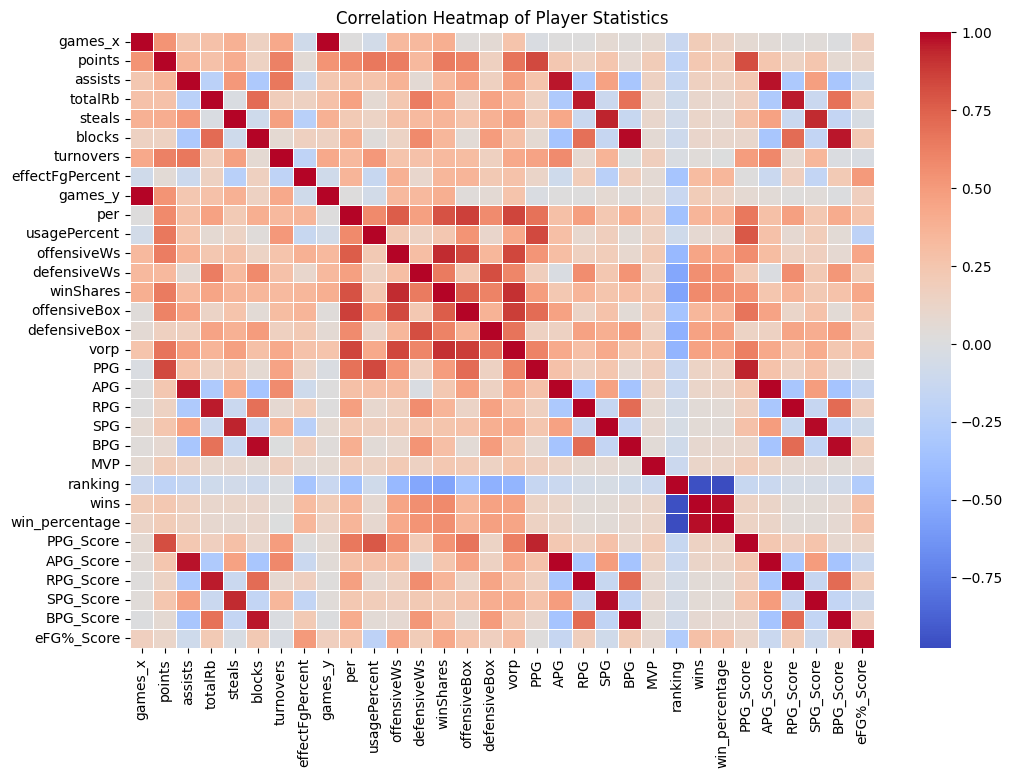

In [6]:
df = pd.read_csv(r'/Users/manishkavuri/Downloads/nba_player_stats_with_scores.csv')
# Step 1: Exclude the 2022-23 season from analysis
df = df[df["season"] != "2022-23"]

# Step 2: Generate summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Step 3: Compute correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Step 4: Plot a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Player Statistics")
plt.show()

Key Interpretations of the Heat Map:
1. PPG, APG, RPG, WS, PER, and VORP likely have high correlations with MVP wins.
2. Team Wins & Win Percentage could be important, since MVPs usually come from top teams.
3. Turnovers and Fouls may have a weak or negative correlation with MVP selection.




Now let's explore these statistics for MVPs vs non-MVPs


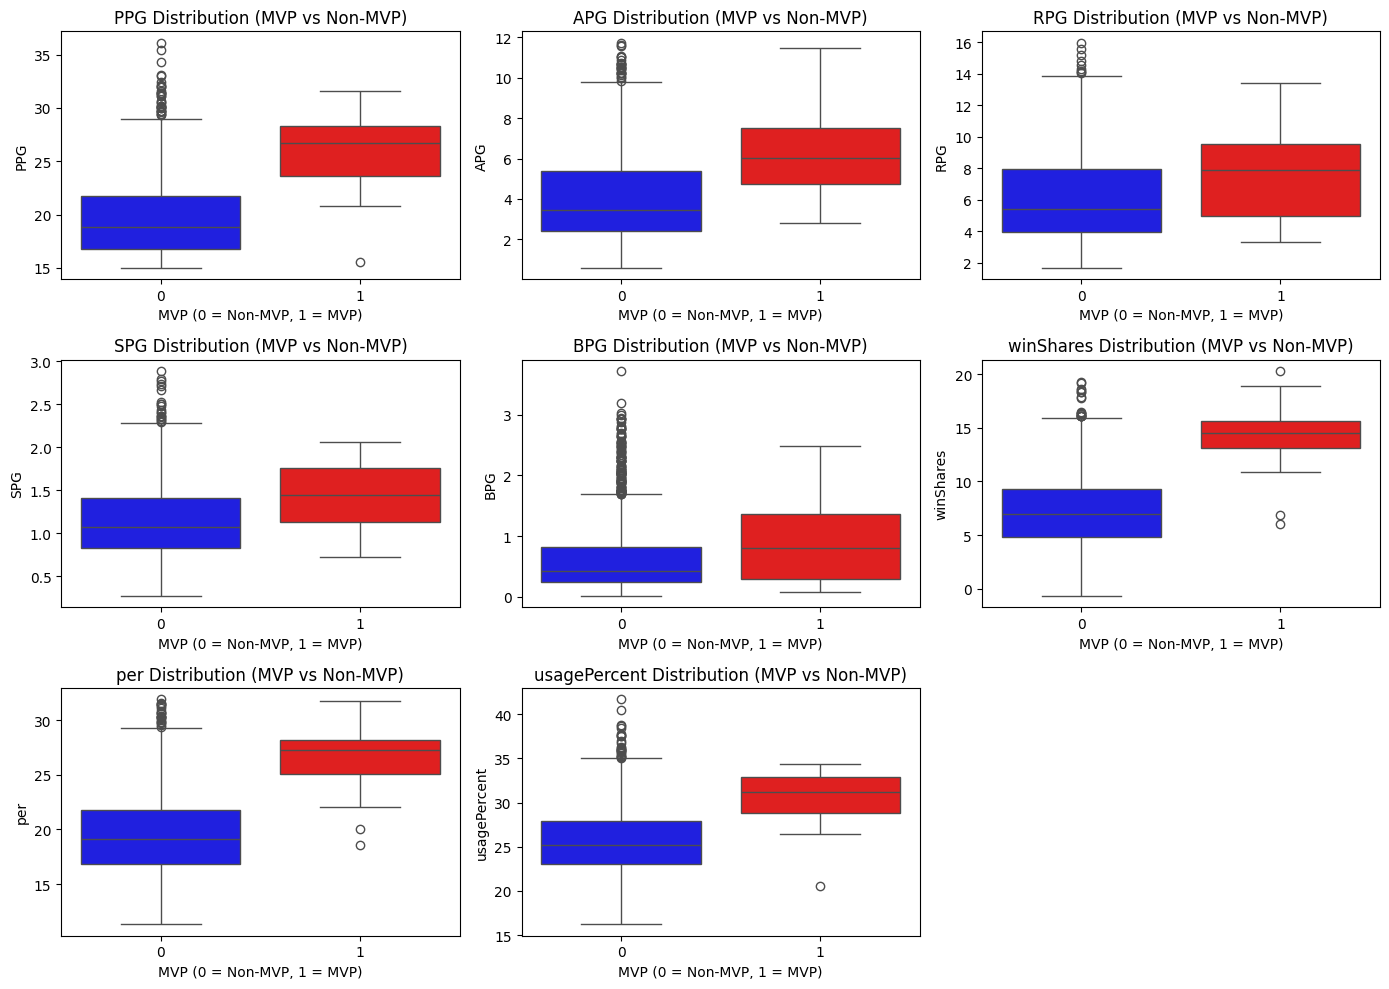

In [8]:
# Exclude the 2022-23 season from analysis
df = df[df["season"] != "2022-23"]

# Separate MVPs and Non-MVPs
mvp_players = df[df["MVP"] == 1]
non_mvp_players = df[df["MVP"] == 0]

# Select key metrics for comparison
key_metrics = ["PPG", "APG", "RPG", "SPG", "BPG", "winShares", "per", "usagePercent"]

# Set up the figure
plt.figure(figsize=(14, 10))

# Generate boxplots for each metric
for i, metric in enumerate(key_metrics):
    plt.subplot(3, 3, i + 1)  # Creates a grid layout
    sns.boxplot(data=df, x="MVP", y=metric, hue = "MVP", palette={0: "blue", 1: "red"}, legend= False)
    plt.title(f"{metric} Distribution (MVP vs Non-MVP)")
    plt.xlabel("MVP (0 = Non-MVP, 1 = MVP)")
    plt.ylabel(metric)

# Adjust layout and display
plt.tight_layout()
plt.show()

Findings:
- tells us that most of the MVP winners are on average much higher in these statistics
- Win Shares, PER, Usage, and PPG are very strong indicators



Now I want to run a t-test to see identify how strong each statistic is



T-Test Results for MVP vs Non-MVP:
         Metric  t-statistic       p-value
0           PPG     6.870482  1.707228e-06
1           APG     4.277544  4.351155e-04
2           RPG     2.341864  3.064139e-02
3           SPG     2.806169  1.148696e-02
4           BPG     1.559014  1.360785e-01
5     winShares     8.365529  1.082303e-07
6           per     8.640279  6.260767e-08
7  usagePercent     5.866444  1.301917e-05
8     turnovers     6.037513  9.532685e-06

Correlation Analysis of MVP Metrics:
                 Correlation with MVP
MVP                          1.000000
vorp                         0.255065
winShares                    0.235632
offensiveWs                  0.216158
per                          0.210305
offensiveBox                 0.207976
points                       0.201237
PPG_Score                    0.195644
turnovers                    0.179858
PPG                          0.177422
defensiveWs                  0.154820
assists                      0.152520
de

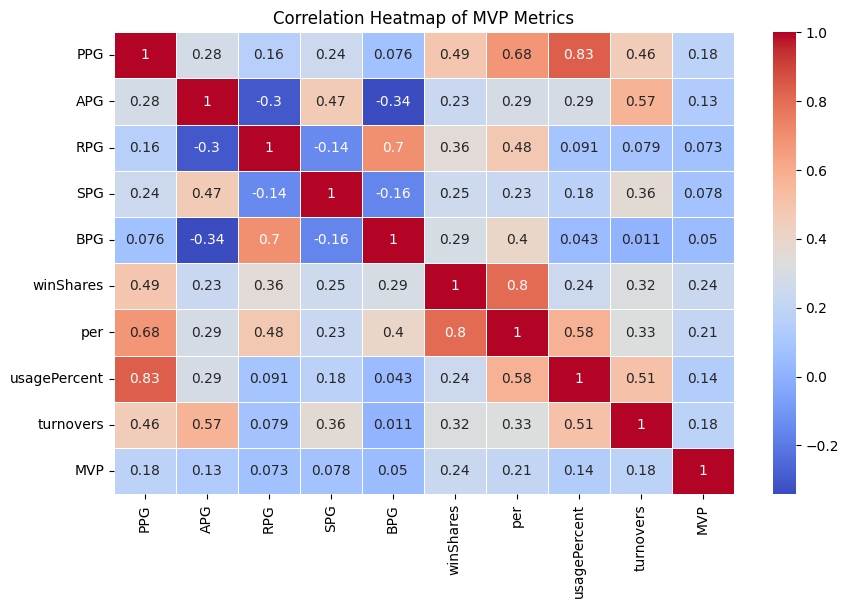

In [12]:
from scipy.stats import ttest_ind

# Exclude the 2022-23 season from analysis
df = df[df["season"] != "2022-23"]

# Separate MVPs and Non-MVPs
mvp_players = df[df["MVP"] == 1]
non_mvp_players = df[df["MVP"] == 0]

# Define key metrics for analysis
key_metrics = ["PPG", "APG", "RPG", "SPG", "BPG", "winShares", "per", "usagePercent", "turnovers"]

# Run t-tests for each metric
t_test_results = []
for metric in key_metrics:
    t_stat, p_value = ttest_ind(mvp_players[metric], non_mvp_players[metric], equal_var=False)  # Welch’s t-test
    t_test_results.append({"Metric": metric, "t-statistic": t_stat, "p-value": p_value})

# Convert to DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Display the t-test results
print("\nT-Test Results for MVP vs Non-MVP:")
print(t_test_df)

# Compute correlation of all metrics with MVP status
mvp_correlation = df.corr(numeric_only=True)["MVP"].sort_values(ascending=False)

# Convert to DataFrame
correlation_df = mvp_correlation.to_frame(name="Correlation with MVP")

# Display correlation analysis
print("\nCorrelation Analysis of MVP Metrics:")
print(correlation_df)

# Plot a heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[key_metrics + ["MVP"]].corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of MVP Metrics")
plt.show()

T Test Findings:
- PPG, Win Shares, PER, and Usage% are the strongest differentiators of MVPs.
- APG, RPG, and SPG also significantly separate MVPs from non-MVPs.
- Blocks Per Game is NOT significantly different between MVPs and non-MVPs, meaning it’s likely not useful for MVP prediction.

/var/folders/m4/30h3h5c94fvfdkd1zs59v6w80000gn/T/ipykernel_26265/3328695432.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted["Correlation with MVP"], palette="coolwarm")


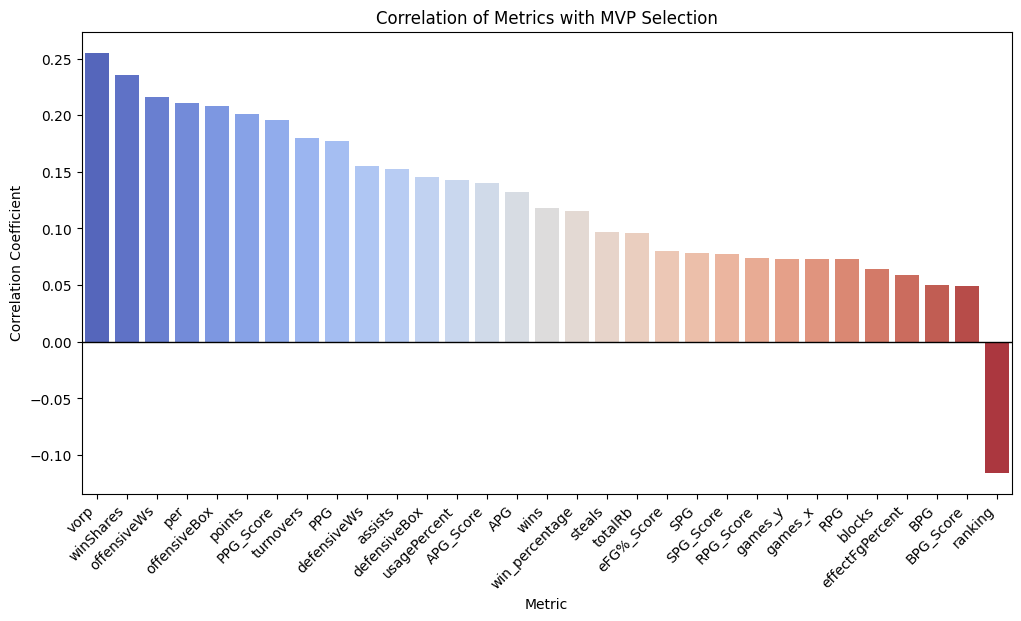

In [11]:
# visualize the correlation of MVP metrics using a bar chart

df = df[df["season"] != "2022-23"]

# Compute correlation of all metrics with MVP status
mvp_correlation = df.corr(numeric_only=True)["MVP"].sort_values(ascending=False)

# Convert to DataFrame
correlation_df = mvp_correlation.to_frame(name="Correlation with MVP")

# Sort correlation values for better visualization (excluding MVP itself)
correlation_df_sorted = correlation_df.drop("MVP").sort_values(by="Correlation with MVP", ascending=False)

# Plot bar chart for correlation strength
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted["Correlation with MVP"], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Correlation of Metrics with MVP Selection")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Metric")
plt.axhline(0, color="black", linewidth=1)  # Add a baseline at 0 for reference
plt.show()